In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


In [ ]:
!python --version

Python 3.12.12


In [ ]:
#!pip list

# De ce tensor? Tensor - este un array specific

In [ ]:
numere = np.array([1, 2, 3, 4])
numere

array([1, 2, 3, 4])

In [ ]:
tf.constant(numere)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4])>

In [ ]:
tf.zeros(shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.ones(shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
my_tensor = tf.fill(dims=(3, 3), value=10)
my_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]], dtype=int32)>

In [ ]:
my_tensor.numpy()

array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]], dtype=int32)

In [ ]:
tf.random.uniform(shape=(3, 3), minval=10, maxval=50)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[41.152958, 19.265713, 38.73555 ],
       [11.351991, 37.743202, 21.81057 ],
       [17.829212, 39.11342 , 41.02713 ]], dtype=float32)>

In [ ]:
numere = np.array([1, 2, 3, 4])
variabila_tf = tf.Variable(numere)
print(variabila_tf)

<tf.Variable 'Variable:0' shape=(4,) dtype=int64, numpy=array([1, 2, 3, 4])>


In [ ]:
variabila_tf + [1, 1, 1, 1] # creaza o noua valoare (un nou tensor)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([2, 3, 4, 5])>

In [ ]:
variabila_tf

<tf.Variable 'Variable:0' shape=(4,) dtype=int64, numpy=array([1, 2, 3, 4])>

In [ ]:
variabila_tf.assign_add([1, 1, 1, 1]) # schimb "in-place" variabila

<tf.Variable 'UnreadVariable' shape=(4,) dtype=int64, numpy=array([2, 3, 4, 5])>

In [ ]:
variabila_tf

<tf.Variable 'Variable:0' shape=(4,) dtype=int64, numpy=array([2, 3, 4, 5])>

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Pot schimba tipul excutie -> din menu (Executie -> schimbati tipul executiei)

In [ ]:
with tf.device("/device:CPU:0"):
  print("Acum ruleaza pe CPU")

Acum ruleaza pe CPU


In [ ]:
with tf.device("/device:GPU:0"):
  print("Acum ruleaza pe GPU")

Acum ruleaza pe GPU


# Cum putem să construim un model in tensorflow

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [ ]:
x = np.arange(10, 21)
y = 2 * x + 1
x, y

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 array([21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]))

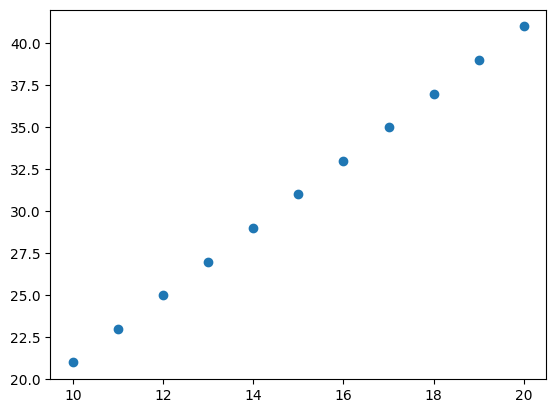

In [ ]:
plt.scatter(x, y);

In [ ]:
x = x.reshape(-1, 1)
x

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [ ]:
lr_model.fit(x, y)

LinearRegression()

In [ ]:
lr_model.predict([[14.5]])

array([30.])

# Keras -> este un wrapper (high-level)

In [ ]:
tf.keras

<KerasLazyLoader (keras_3) keras._tf_keras.keras as keras mode=None>

In [ ]:
import keras

In [ ]:
keras

<module 'keras' from '/usr/local/lib/python3.12/dist-packages/keras/__init__.py'>

In [ ]:
model_seq = tf.keras.models.Sequential()
model_seq

<Sequential name=sequential, built=False>

In [ ]:
x[0].shape

(1,)

In [ ]:
input_layer = tf.keras.layers.Input(shape=(1,))

In [ ]:
model_seq.add(input_layer)

In [ ]:
model_seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
first_dense_layer = tf.keras.layers.Dense(units=1)
model_seq.add(first_dense_layer)
model_seq.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_seq.compile(optimizer="adam", loss="mean_squared_error", metrics=['mae'])

In [ ]:
history = model_seq.fit(x, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1299.0519 - mae: 35.3091
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 1297.8765 - mae: 35.2931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 1296.7015 - mae: 35.2771
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1295.5273 - mae: 35.2611
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 1294.3538 - mae: 35.2451
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 1293.1807 - mae: 35.2291
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 1292.0081 - mae: 35.2132
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - loss: 1290.8362 - mae: 35.1972
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 1289.6647 - mae: 35.1812
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 1288.4940 - mae: 35.1652
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 1287.3240 - mae: 35.1492
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 1286.1543 - mae: 3

In [ ]:
lr_model.predict([[10]])

array([21.])

In [ ]:
model_seq.predict(np.array([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[-1.7813021]], dtype=float32)

In [ ]:
pd.DataFrame(history.history)

,loss,mae
0,1299.051880,35.309143
1,1297.876465,35.293148
2,1296.701538,35.277142
3,1295.527344,35.261147
4,1294.353638,35.245144
...,...,...
95,1190.540161,33.800140
96,1189.434448,33.784416
97,1188.329712,33.768696
98,1187.225586,33.752983
